<a href="https://colab.research.google.com/github/sarahtb13/Finanzas-Computacionales/blob/main/FC_clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manejo de series de tiempo financieras y caracterización de las variables

In [ ]:
# Se importan las librerías
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Paa descargar datos del mercado
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# Precios históricos para los activos seleccionados
activos = ["AAPL", "MSFT"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31")
precios = precios.loc[:,"Adj Close"]
precios#.plot()

[*********************100%***********************]  2 of 2 completed


,AAPL,MSFT
Date,,
2010-01-04,6.526020,23.800228
2010-01-05,6.537303,23.807911
2010-01-06,6.433319,23.661806
2010-01-07,6.421427,23.415731
2010-01-08,6.464118,23.577217
...,...,...
2021-12-23,175.553558,333.223267
2021-12-27,179.586868,340.949280
2021-12-28,178.551147,339.754517


In [ ]:
# Calculo de los retornos continuos o logaritmicos
#retornos = precios.pct_change().dropna()

In [ ]:
retornos=np.log(precios/precios.shift()).dropna()
retornos

,AAPL,MSFT
Date,,
2010-01-05,0.001728,0.000323
2010-01-06,-0.016034,-0.006156
2010-01-07,-0.001850,-0.010454
2010-01-08,0.006626,0.006873
2010-01-11,-0.008861,-0.012802
...,...,...
2021-12-23,0.003637,0.004462
2021-12-27,0.022715,0.022921
2021-12-28,-0.005784,-0.003510


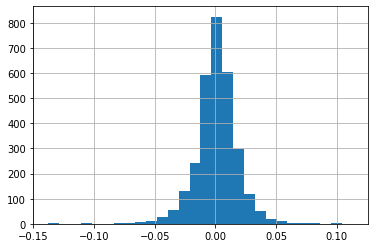

In [ ]:
retornos["AAPL"].hist(bins=28)

In [ ]:
# Info de las series
retornos.describe()

,AAPL,MSFT
count,3019.000000,3019.000000
mean,0.001094,0.000879
std,0.017687,0.015787
min,-0.137708,-0.159454
25%,-0.007047,-0.006655
50%,0.001000,0.000695
75%,0.010451,0.008754
max,0.113157,0.132929


In [ ]:
np.log(3019)*3.32+1

27.602100686626706

In [ ]:
# Parámetros
mean,sigma=retornos['MSFT'].mean(),retornos["MSFT"].std()
mean,sigma
mean*252,sigma*np.sqrt(252)

(0.22143750493040526, 0.2506114939070312)

In [ ]:
# Retorno equivalente y conversión
np.log(1+mean*252)

0.2000284478447182

In [ ]:
# Histograma: hist()

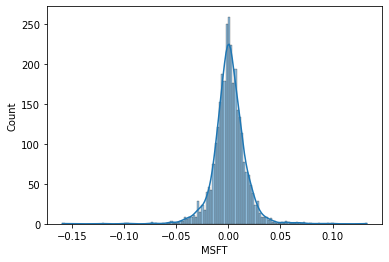

In [ ]:
sbn.histplot(data=retornos, x="MSFT", kde=True)

# Pruebas de normalidad

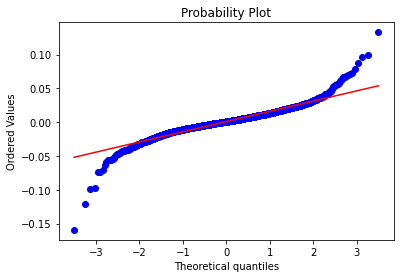

In [ ]:
import scipy.stats as stats
import pylab as py
stats.probplot(retornos["MSFT"], dist="norm", plot=py)
py.show()

In [ ]:
# Prueba de Kolmogorov-Smirnov
stats.kstest(retornos["MSFT"],'norm')

KstestResult(statistic=0.47528465415358023, pvalue=0.0)

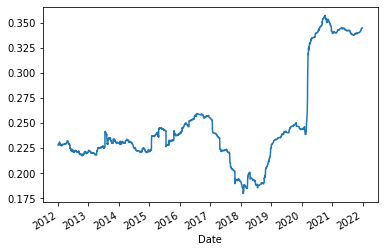

In [ ]:
# Comportamiento de los parámetros
rolling_std = (retornos["MSFT"].rolling(window=504).std())*np.sqrt(252) 
rolling_std.plot()
# y sobre las series anualizadas?

# Relación entre activos

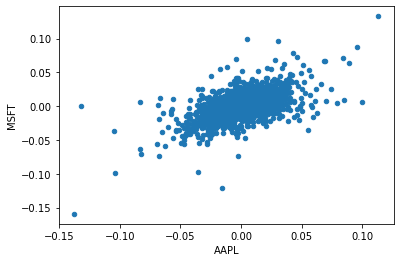

In [ ]:
retornos.plot(kind="scatter",x="AAPL",y="MSFT")

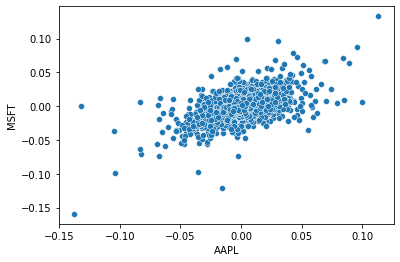

In [ ]:
sbn.scatterplot( x = "AAPL", 
                 y = "MSFT", 
                 data = retornos)

In [ ]:
retornos.corr()

,AAPL,MSFT
AAPL,1.00000,0.56627
MSFT,0.56627,1.00000


In [ ]:
# Precios históricos mensuales
# Precios históricos para los activos seleccionados
activos = ["AAPL", "MSFT"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
precios = precios.loc[:,"Adj Close"]
precios#.plot()

[*********************100%***********************]  2 of 2 completed


,AAPL,MSFT
Date,,
2010-01-01,5.856678,21.670124
2010-02-01,6.239682,22.046925
2010-03-01,7.166090,22.629028
2010-04-01,7.961677,23.594757
2010-05-01,7.833299,19.932709
...,...,...
2021-08-01,150.758072,299.434967
2021-09-01,140.711517,280.171967
2021-10-01,148.965271,329.563782


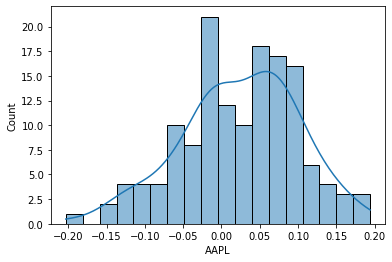

In [ ]:
ret= np.log(precios/precios.shift()).dropna()
sbn.histplot(data=ret, x="AAPL", kde=True, bins=18)

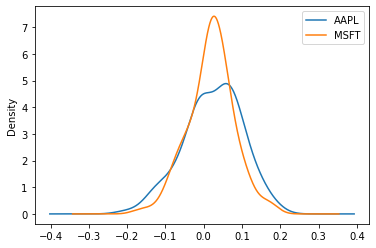

In [ ]:
# Comparación de distribuciones
ret['AAPL'].plot(kind='kde',label="AAPL")
ret['MSFT'].plot(kind='kde',label="MSFT")
plt.legend()

In [ ]:
# Precios históricos para los activos seleccionados: TSLA y GE
activos = ["TSLA", "GE"]
# Precios históricos mensuales
# Precios históricos para los activos seleccionados

precios = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
precios = precios.loc[:,"Adj Close"]
precios#.plot()

[*********************100%***********************]  2 of 2 completed


,GE,TSLA
Date,,
2010-07-01,92.505020,3.988000
2010-08-01,83.093834,3.896000
2010-09-01,93.251045,4.082000
2010-10-01,92.611320,4.368000
2010-11-01,91.512909,7.066000
...,...,...
2021-08-01,105.016113,735.719971
2021-09-01,102.644997,775.479980
2021-10-01,104.559372,1114.000000


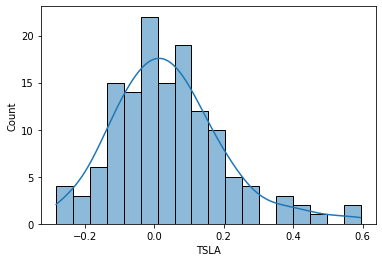

In [ ]:
ret= np.log(precios/precios.shift()).dropna()
sbn.histplot(data=ret, x="TSLA", kde=True, bins=18)

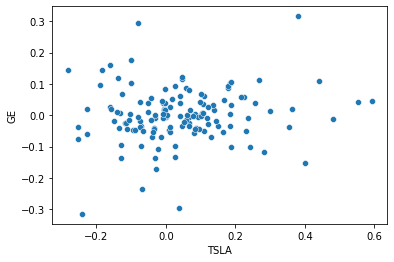

In [ ]:
sbn.scatterplot( x = "TSLA", 
                 y = "GE", 
                 data = ret)

In [ ]:
ret.corr()

,GE,TSLA
GE,1.000000,0.111815
TSLA,0.111815,1.000000
